## MODULE PLACEMENT NEW ALGORITHM :: WORKING ::

In [84]:
from shapely.geometry import Polygon
from matplotlib import pyplot as plt
import numpy as np
import shapely
from shapely.prepared import prep

In [85]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
from functions import extract_x_y

In [87]:
## CONSTANTS
MODULE_HEIGHT = 67.72
MODULE_WIDTH = 44.64

In [88]:
{
    "roof_pts": [
        {
            "x": 919.5159405421109,
            "y": 914.1873642106711
        },
        { 
            "x": 666.7406365581767,
            "y": 752.3312407110769
        },
        {
            "x": 610.7903716447368,
            "y": 508.5479435882313
        },
        {
            "x": 651.7539584563624,
            "y": 487.5665942456913
        },
        {
            "x": 766.6518239036053,
            "y": 287.7442195548342
        },
        {
            "x": 919.5159405421109,
            "y": 914.1873642106711
        }
    ],
    "ridge_pts": [
        [
            666.7406365581767,
            752.3312407110769
        ],
        [
            610.7903716447368,
            508.5479435882313
        ]
    ],
    "eve_pts": [
        [
            766.6518239036053,
            287.7442195548342
        ],
        [
            919.5159405421109,
            914.1873642106711
        ]
    ],
    "firesetback_distance": 20,
    "module_height": 67.72,
    "module_width": 44.64
}

roof = [
        {
            "x": 919.5159405421109,
            "y": 914.1873642106711
        },
        {
            "x": 666.7406365581767,
            "y": 752.3312407110769
        },
        {
            "x": 610.7903716447368,
            "y": 508.5479435882313
        },
        {
            "x": 651.7539584563624,
            "y": 487.5665942456913
        },
        {
            "x": 766.6518239036053,
            "y": 287.7442195548342
        },
        {
            "x": 919.5159405421109,
            "y": 914.1873642106711
        }
    ]
# roof = [
#         {
#             "x": 886.4090606262491,
#             "y": 596.6022651565622
#         },
#         {
#             "x": 422.71818787475013,
#             "y": 647.5682878081279
#         },
#         {
#             "x": 445.7028647568288,
#             "y": 867.4217188540972
#         },
#         {
#             "x": 807.4616922051965,
#             "y": 823.4510326449034
#         },
#         {
#             "x": 798.4676882078614,
#             "y": 710.5263157894736
#         },
#         {
#             "x": 875.4163890739507,
#             "y": 697.5349766822118
#         },
#         {
#             "x": 886.4090606262491,
#             "y": 596.6022651565622
#         }
#     ]

# ridge_pts = [
#         [
#             886.4090606262491,
#             596.6022651565622
#         ],
#         [
#             422.71818787475013,
#             647.5682878081279
#         ]
# ]
ridge_pts =[
        [
            666.7406365581767,
            752.3312407110769
        ],
        [
            610.7903716447368,
            508.5479435882313
        ]
    ]
eve_pts = [
        [
            766.6518239036053,
            287.7442195548342
        ],
        [
            919.5159405421109,
            914.1873642106711
        ]
    ]

In [89]:
def calc_ratio(short_distance, len_of_line):
    return short_distance / len_of_line

In [90]:
def calc_distance_bwn_2_pts(line_pts: list) -> int:
    """Takes input of points [[x1,y1], [x2,y2] ]"""
    dist = ( (line_pts[1][0] - line_pts[0][0])**2 + (line_pts[1][1] - line_pts[0][1])**2 )**0.5
    return dist

In [91]:
# get firesetback at given distance
def get_firesetback(roof_polygon, distance):
    return roof_polygon.buffer(-distance, cap_style='flat', join_style='mitre')

In [92]:
def identify_side_on_firesetback(firesetback, ridge_pts, firesetback_dist, match_key):
    """
    firesetback: shapely.Polygon
    ridge_pts: [ [x1,y1], [x2,y2] ]
    firesetback_dist: int
    match_key: str

    given firesetback polygon, a ridge line, firesetback distance, match key
    this will create a new list of points with match to the 
    """
    adjusted_firesetback = firesetback.buffer(firesetback_dist, cap_style='flat', join_style='mitre')
    adj_firesetback_pts = adjusted_firesetback.boundary.coords.xy
    ridge_arr = np.around(np.array(ridge_pts), decimals=3)

    firesetback_pts = firesetback.boundary.coords.xy

    fsb_lines = []

    for point in range(len(adj_firesetback_pts[0]) - 1):
        start = [adj_firesetback_pts[0][point], adj_firesetback_pts[1][point]]
        end = [adj_firesetback_pts[0][point+1], adj_firesetback_pts[1][point + 1]]

        act_line_start = [firesetback_pts[0][point], firesetback_pts[1][point]]
        act_line_end = [firesetback_pts[0][point+1], firesetback_pts[1][point + 1]]

        line = np.around(np.array([start, end]), decimals=3)
        reverse_line = np.around(np.array([end, start]), decimals=3)

        act_line = np.array([act_line_start, act_line_end])
        act_reverse_line = np.array([act_line_end, act_line_start])

        

        match = np.array_equal(ridge_arr, line)

        if match:

            line_obj = {
                "id": point,
                "coords": act_line,
                match_key: match
            }
        else:
            match =  np.array_equal(ridge_arr, reverse_line)
            line_obj = {
                "id": point,
                "coords": act_reverse_line,
                match_key: match
            }
        fsb_lines.append(line_obj)
    return fsb_lines



In [93]:
def check_point_bwn_AB(point, line, tolerence=0.0000001):
    A = line[0]
    B = line[1]
    AC = calc_distance_bwn_2_pts([A, point])
    BC = calc_distance_bwn_2_pts([B, point])
    AB = calc_distance_bwn_2_pts(line)

    status = (AB <= AC+BC+tolerence) & (AB >= (AC+BC)-tolerence)
    return status

In [94]:

def calc_poi(line_1, line_2):
    line_1 = np.array(line_1)
    line_2_x, line_2_y = extract_x_y(line_2)

    line_2 = np.array(line_2)
    line_1_x, line_1_y = extract_x_y(line_1)

    line_2_dx = line_2_x[1] - line_2_x[0]
    line_2_dy = line_2_y[1] - line_2_y[0]

    line_1_dx = line_1_x[1] - line_1_x[0]
    line_1_dy = line_1_y[1] - line_1_y[0]

    line_2_slope = line_2_dy / line_2_dx
    line_1_slope = line_1_dy / line_1_dx

    line_1_c = line_1_y[0] - (line_1_slope * line_1_x[0])
    line_2_c = line_2_y[0] - (line_2_slope * line_2_x[0])

    x = (line_1_c - line_2_c) / (line_2_slope - line_1_slope)
    y = (line_2_slope*x) + line_2_c

    return x, y


In [95]:

def calc_perpendicular(main_line_pts, rafter_pt, D):
    # def calc_perpendicular(x1, y1, x2, y2, Px1, Py1, D):
    x1, y1 = main_line_pts[0][0], main_line_pts[0][1]
    x2, y2 = main_line_pts[1][0], main_line_pts[1][1]
    Px1, Py1 = rafter_pt[0], rafter_pt[1]

    ABx = x2 - x1
    ABy = y2 - y1

    # Normalize the direction vector
    length_AB = (ABx**2 + ABy**2)**0.5
    ux = ABx / length_AB
    uy = ABy / length_AB

    # Perpendicular vector
    vx = -uy
    vy = ux

    # Calculate the coordinates of point Q at distance D from P
    Qx1 = Px1 + D * vx
    Qy1 = Py1 + D * vy

    return Qx1, Qy1


In [96]:

def calculate_parallel_line(line, distance):
    line = np.array(line)
    x1, y1 = line[0]
    x2, y2 = line[1]

    dx = x2 - x1
    dy = y2 - y1

    length = (dx**2 + dy**2)**0.5

    ux = dx / length
    uy = dy / length

    vx = -uy
    vy = ux

    x3 = x1 + distance * vx
    y3 = y1 + distance * vy

    x4 = x2 + distance * vx
    y4 = y2 + distance * vy

    return [x3, y3], [x4, y4]

In [97]:
def calc_projection(lengthy_line_pts, smaller_line_pts) -> tuple:
    """calculates the Perpendicular projection points of lengthhy line
    on smaller lines
    returns: ([x1,y1], [x2,y2])"""

    eve_x, eve_y = extract_x_y(lengthy_line_pts)

    eve_start = calc_perpendicular(lengthy_line_pts, [eve_x[0], eve_y[0]], 3)
    eve_end = calc_perpendicular(lengthy_line_pts, [eve_x[1], eve_y[1]], 3)

    eve_start_proj = calc_poi([lengthy_line_pts[0], eve_start], smaller_line_pts)
    eve_end_proj = calc_poi([lengthy_line_pts[1], eve_end], smaller_line_pts)

    return eve_start_proj, eve_end_proj


In [98]:
def get_points_at_eq_distance(st_line_pts, distance_bwn_pts_px):
    """Takes input of points [[x1,y1], [x2,y2] ]"""
    POINTS = []

    len_of_ridge = calc_distance_bwn_2_pts(st_line_pts)
    no_of_points = int(len_of_ridge // distance_bwn_pts_px)
    initial_distance = distance_bwn_pts_px

    for i in range(no_of_points):
        ratio_i = calc_ratio(initial_distance, len_of_ridge)
        u = st_line_pts[0][0] + ratio_i * (st_line_pts[1][0] - st_line_pts[0][0])
        v = st_line_pts[0][1] + ratio_i * (st_line_pts[1][1] - st_line_pts[0][1])
        initial_distance += distance_bwn_pts_px
        POINTS.append((u, v))

    return {"points": POINTS, "count": no_of_points}

### algorithm


1. first we draw the fire setback
2. then we identify which side of the firesetback is ridge and eve
3. check weather the ridge_len  > eve_len or eve_len > ridge
4. if ridge>eve:
        extend the eve to match the ridge
5. if eve> ridge:
        extend the ridge to match the eve
6. 

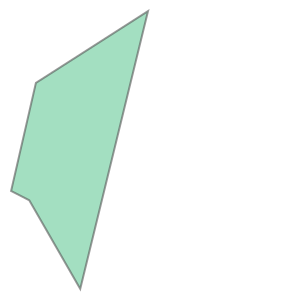

In [99]:
roof_pts = [(p['x'], p['y']) for p in roof]
roof_polygon = shapely.Polygon(roof_pts)
roof_polygon

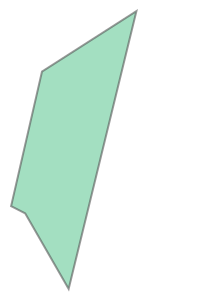

In [100]:
firesetback = get_firesetback(roof_polygon, 50)
firesetback

In [101]:
ridge_identified_fsb = identify_side_on_firesetback(firesetback, ridge_pts, 20, "ridge")

In [102]:
eve_identified_fsb = identify_side_on_firesetback(firesetback, eve_pts, 20, "eave")

In [103]:
ridge_fsb = filter(lambda x: x['ridge']==True, ridge_identified_fsb)
ridge_fsb_side = list(ridge_fsb)[0]['coords']
ridge_fsb_side

IndexError: list index out of range

In [ ]:
eave_fsb = filter(lambda x: x['eave']==True, eve_identified_fsb)
eave_fsb_side = list(eave_fsb)[0]['coords']
eave_fsb_side

array([[759.07229298, 341.04869766],
       [888.24842209, 870.41754048]])

In [ ]:
ridge_len = calc_distance_bwn_2_pts(ridge_fsb_side)
eave_len = calc_distance_bwn_2_pts(eave_fsb_side)

In [ ]:
# if len of ridge_len > eave_len:
    # set the line of extensions as eave_len
extended_line_type = ''
l1 = []
l2 = []
if ridge_len > eave_len:
    extended_line_type = "eave"
    extended_line = calc_projection(ridge_fsb_side, eave_fsb_side)
    l1_points = np.array([ridge_fsb_side[0], extended_line[0]])
    l2_points = np.array([ridge_fsb_side[1], extended_line[1]])
    l1.extend(l1_points)
    l2.extend(l2_points)
    
else:
    extended_line_type = "ridge"
    extended_line = calc_projection(eave_fsb_side, ridge_fsb_side)
    l1_points = np.array([eave_fsb_side[0], extended_line[0]])
    l2_points = np.array([eave_fsb_side[1], extended_line[1]])
    l1.extend(l1_points)
    l2.extend(l2_points)

by this time we will be aware of which side of line is extended either **Ridge** or **Eave** \
Now we need to take the edge points of the extended line and other one and then find the distance on each other side.  

In [ ]:
l1_rows = get_points_at_eq_distance(l1, MODULE_HEIGHT)

In [ ]:
l2_rows = get_points_at_eq_distance(l2, MODULE_HEIGHT)

---
By this time we know, the number of rows that can fit in the fireset back, we need to draw the parallel lines between line1 and line2

**Problems** \
Parallel line can be any side of the roof. we need to validate this by checking the poi with l1 or l2 and poi should be within l1 and l2


In [ ]:
no_of_rows = l1_rows['count'] if l1_rows['count'] > l2_rows['count'] else l2_rows['count']
no_of_rows

2

In [ ]:
fsb_prep = prep(firesetback)
parallel_lines = []
POINTS = []
initial_dist = MODULE_HEIGHT
rp = get_points_at_eq_distance(ridge_fsb_side, MODULE_WIDTH)
POINTS.append(rp['points'])

for i in range(no_of_rows):
    line = calculate_parallel_line(ridge_fsb_side, initial_dist)
    poi = calc_poi(l1, line)
    if check_point_bwn_AB(poi, l1): 
        parallel_lines.append(line)
        splits = get_points_at_eq_distance(line, MODULE_WIDTH)
        
        pts = [p for p in splits['points'] if fsb_prep.contains(shapely.Point(p)) ]
        POINTS.append(pts)
        
        # POINTS.extend(splits['points'])
    else:
        line = calculate_parallel_line(ridge_fsb_side, -initial_dist)
        parallel_lines.append(line)
        point = get_points_at_eq_distance(line, MODULE_WIDTH)
        splits = get_points_at_eq_distance(line, MODULE_WIDTH)

        pts = [p for p in splits['points'] if fsb_prep.contains(shapely.Point(p)) ]
        POINTS.append(pts)
        
        # POINTS.append(splits['points'])
    initial_dist += MODULE_HEIGHT
    
    

In [ ]:
POINTS

[[(np.float64(674.4205506184838), np.float64(696.3852363834503)),
  (np.float64(664.434921403993), np.float64(652.8764233774546)),
  (np.float64(654.4492921895021), np.float64(609.3676103714588)),
  (np.float64(644.4636629750113), np.float64(565.858797365463)),
  (np.float64(634.4780337605205), np.float64(522.3499843594673))],
 [(np.float64(740.4245115675437), np.float64(681.2367863295677)),
  (np.float64(730.4388823530529), np.float64(637.727973323572)),
  (np.float64(720.453253138562), np.float64(594.2191603175761)),
  (np.float64(710.4676239240712), np.float64(550.7103473115804)),
  (np.float64(700.4819947095804), np.float64(507.20153430558463))],
 [(np.float64(806.4284725166036), np.float64(666.0883362756852)),
  (np.float64(796.4428433021128), np.float64(622.5795232696894)),
  (np.float64(786.4572140876219), np.float64(579.0707102636936)),
  (np.float64(776.4715848731311), np.float64(535.5618972576978)),
  (np.float64(766.4859556586403), np.float64(492.053084251702))]]

In [ ]:
parallel_lines

[([np.float64(750.4101407820345), np.float64(724.7455993355635)],
  [np.float64(699.7706186374176), np.float64(504.1019671340181)]),
 ([np.float64(816.4141017310944), np.float64(709.5971492816809)],
  [np.float64(765.7745795864774), np.float64(488.95351708013544)])]

In [ ]:
# # preparing polygon for checking
# fsb_prep = prep(firesetback)

# prep_points = []
# prep_points.append(rp['points'])
# for row in POINTS[1:]:
#     row_pt = []
#     for pt in row:
#         p = shapely.Point(pt)
#         status = fsb_prep.contains(p)
#         if status:
#             row_pt.append(pt)
#     prep_points.append(row_pt)

# # rp = get_points_at_eq_distance(ridge_fsb_side, MODULE_WIDTH)

# # POINTS.append(rp['points'])
# # prep_points.append(rp['points'])

In [ ]:
# prep_points

In [ ]:
temp_parallel_lines = [ridge_fsb_side]
temp_parallel_lines.extend(parallel_lines)
temp_parallel_lines = np.array(temp_parallel_lines)
temp_parallel_lines

array([[[684.40617983, 739.89404939],
        [633.76665769, 519.25041719]],

       [[750.41014078, 724.74559934],
        [699.77061864, 504.10196713]],

       [[816.41410173, 709.59714928],
        [765.77457959, 488.95351708]]])

now we have two cases \
1. When the curr line is bigger than the prev line
2. when the prev line is bigger than the current line

calculation will be depend on the above cases. \
if case 1 then, we need to calculate the curr line pts agian 


In [ ]:
corrected_rows = []

for line_idx in range(1, len(temp_parallel_lines)):
    curr_line_pts = POINTS[line_idx]
    prev_line_pts =  POINTS[line_idx - 1]

    curr_line = temp_parallel_lines[line_idx]
    prev_line = temp_parallel_lines[line_idx - 1]

    set_no_of_pts, bigger_line, smaller_line = (len(curr_line_pts), prev_line_pts, curr_line_pts) \
                                if len(curr_line_pts) <= len(prev_line_pts) \
                                else (len(prev_line_pts), curr_line_pts, prev_line_pts)
   
    
    new_line1_pts = []
    new_line2_pts = []
    for i in range(set_no_of_pts):
        curr_pt = smaller_line[i]
        # line passing through the curr_pt and perpendicular to curr line
        perp_pt = calc_perpendicular(smaller_line, curr_pt, 5)
        perp_line = [perp_pt, curr_pt]
        # print(perp_line, "\n---\n\n", bigger_line)
        new_pt = calc_poi(bigger_line, perp_line)

        new_line1_pts.append(curr_pt)
        new_line2_pts.append(new_pt)
    corrected_rows.append([new_line1_pts, new_line2_pts])
    

In [ ]:
corrected_rows

[[[(np.float64(740.4245115675437), np.float64(681.2367863295677)),
   (np.float64(730.4388823530529), np.float64(637.727973323572)),
   (np.float64(720.453253138562), np.float64(594.2191603175761)),
   (np.float64(710.4676239240712), np.float64(550.7103473115804)),
   (np.float64(700.4819947095804), np.float64(507.20153430558463))],
  [(np.float64(674.4205506184838), np.float64(696.3852363834501)),
   (np.float64(664.434921403993), np.float64(652.8764233774543)),
   (np.float64(654.4492921895021), np.float64(609.3676103714585)),
   (np.float64(644.4636629750113), np.float64(565.8587973654628)),
   (np.float64(634.4780337605205), np.float64(522.349984359467))]],
 [[(np.float64(806.4284725166036), np.float64(666.0883362756852)),
   (np.float64(796.4428433021128), np.float64(622.5795232696894)),
   (np.float64(786.4572140876219), np.float64(579.0707102636936)),
   (np.float64(776.4715848731311), np.float64(535.5618972576978)),
   (np.float64(766.4859556586403), np.float64(492.053084251702

In [ ]:
# MODULES = []
# for i in range(len(prep_points)-1):
#     curr_row = prep_points[i]
#     next_row = prep_points[i+1]
#     curr_row_pts_len = len(curr_row)
#     next_row_pts_len = len(next_row)

#     loop_len = curr_row_pts_len if curr_row_pts_len <= next_row_pts_len else next_row_pts_len
#     for j in range(loop_len- 1):
#         # curr, next,next, curr
#         module = [ curr_row[j], next_row[j], next_row[j+1], curr_row[j+1] ]
#         MODULES.append(module)

In [ ]:
# prep_points

In [ ]:
# MODULES
MODULES = []
MODULES_Poly = []
for row in corrected_rows:
    row_top = row[0]
    row_btm = row[1]

    for pt in range(len(row_top) - 1 ):
        module = [ row_top[pt], row_btm[pt], row_btm[pt+1], row_top[pt+1]]
        module_poly_shape = shapely.Polygon(module)
        MODULES_Poly.append(module_poly_shape)
        MODULES.append(module)


In [ ]:
array = shapely.MultiPolygon(MODULES_Poly)

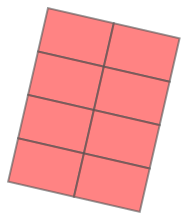

In [ ]:
array

In [ ]:
array.area

24184.166399999984

In [ ]:
roof_polygon.area

89091.5398092019

In [ ]:
test = roof_polygon - firesetback

In [ ]:
test.boundary.svg()

'<g><polyline fill="none" stroke="#66cc99" stroke-width="2.0" points="766.6518239036053,287.7442195548342 651.7539584563624,487.5665942456913 610.7903716447368,508.5479435882313 666.7406365581767,752.3312407110769 919.5159405421109,914.1873642106711 766.6518239036053,287.7442195548342" opacity="0.8" /><polyline fill="none" stroke="#66cc99" stroke-width="2.0" points="684.4061798329747,739.8940493894461 633.7666576883577,519.2504171879007 666.1409190270084,502.6684784534697 759.072292982277,341.0486976616984 888.2484220909324,870.4175404795218 684.4061798329747,739.8940493894461" opacity="0.8" /></g>'

## plotting

In [ ]:
l1_pts = extract_x_y(l1)
l2_pts = extract_x_y(l2)

ridge_p = extract_x_y(ridge_pts)
eave_pt = extract_x_y(eve_pts)

exteneded_pt = extract_x_y(extended_line)



plt.plot(l1_pts[0], l1_pts[1], label="l1")
plt.plot(l2_pts[0], l2_pts[1], label="l2")
plt.plot(ridge_p[0], ridge_p[1], label="R")
plt.plot(eave_pt[0], eave_pt[1], label="E")

for i in range(no_of_rows):
    p = extract_x_y(parallel_lines[i])
    plt.plot(p[0], p[1], label="rows")

# for i in prep_points:
#     p = extract_x_y(i)
#     plt.scatter(p[0], p[1])

plt.plot(exteneded_pt[0], exteneded_pt[1], linestyle='--', c='k', label="Extended")
plt.plot(firesetback.boundary.coords.xy[0], firesetback.boundary.coords.xy[1])
for i in MODULES:
    md_pt = extract_x_y(i)
    plt.plot(md_pt[0], md_pt[1], c='#000000')

# plt.legend()
plt.show()


NameError: name 'l1' is not defined

### Pending work
this will not fit the modules in most optimized way but it will fit the modules in they way it can mostly fit. \ 

the draw back of the system is

<img src="./complex_roof.png" >

in the above case, the points a,b,c,d,e,f,g,h are intersection points that we can figure out by using calc_poi method and iterating over polygon sides. \
**We need to eliminate the (b,c), (d,e), (f,g)** and then make a,b a line and recalculate the module placement. This algorithm if implmented gives the best optimized solution for module placement. 

1. but the problem here is we cannot get these in the same order.

- a,b,c,d,e,f,g,h => (a,b), (c,d), (e,f), (g,h) - given any combination of points we should be able to extract the exact set,
- Note: Every point a, b ... where a = (x,y) -> a point in a two dimensional plane including negative plane. We need to use the 


